<a href="https://colab.research.google.com/github/lucascarter0/DeepLearning.AI-TensorFlow-Certification/blob/main/CNN_Multiclass_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for Week 4 of the Convolutional Neural Network course - notebook trains a multi-class classifier on the MNIST digit database.

In [20]:
import csv
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist

In [21]:
# Load MNIST data and format it for training in the model
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

In [22]:
# Create an ImageDataGenerator to do image augmentation on training set
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Validation data also using generator, but only to scale image color
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(training_images, training_labels, batch_size=20)

validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=20)


In [30]:
# Create a model with two convolution layers and two pooling layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    ])

# Compile Model. Using the sparse crossentropy loss for the multiclass data
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [29]:
# Define a Callback class that stops training once accuracy reaches 90.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("\nReached 98.0% accuracy, cancelling training")
      self.model.stop_training = True

In [32]:
# Train and evaluate model - train on 10 epochs, but model will exit at 90% accuracy
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    callbacks=[myCallback()])

model.evaluate(testing_images, testing_labels, verbose=2)

313/313 - 3s - loss: 2065.4612 - accuracy: 0.5692 - 3s/epoch - 9ms/step


[2065.461181640625, 0.5691999793052673]

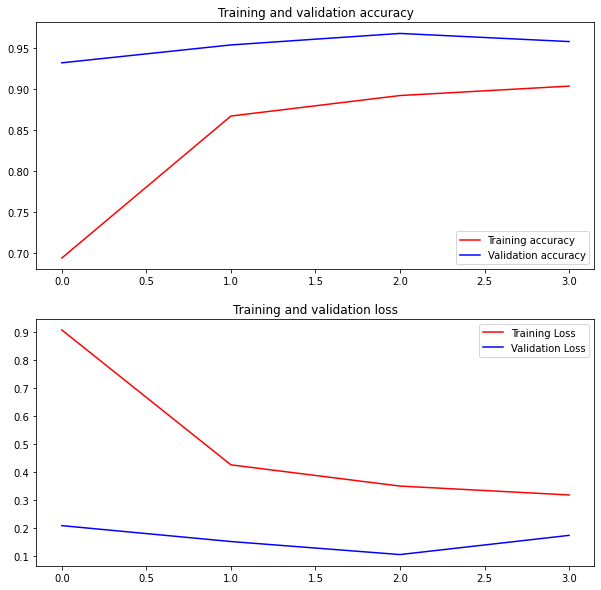

In [34]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10))
ax0.plot(epochs, acc, 'r', label='Training accuracy')
ax0.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax0.set_title('Training and validation accuracy')
ax0.legend()

ax1.plot(epochs, loss, 'r', label='Training Loss')
ax1.plot(epochs, val_loss, 'b', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.legend()
